In [1]:
import pandas as pd
import numpy as np


In [2]:
#reading dataset
df=pd.read_csv('spam.csv',encoding='latin-1')

In [4]:
df 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# last three columns are not explaining so much so we are dropping it
df=df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)


In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
# as we can see that v1 is the target column and v2 is the text column so we will rename it
df=df.rename(columns={'v1':'target','v2':'text'})
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df.target.value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [10]:
# so we have to label encode it
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df["target"]=encoder.fit_transform(df["target"])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.duplicated().sum()

403

In [14]:
df.shape

(5572, 2)

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.shape

(5169, 2)

**EDA**

<AxesSubplot:>

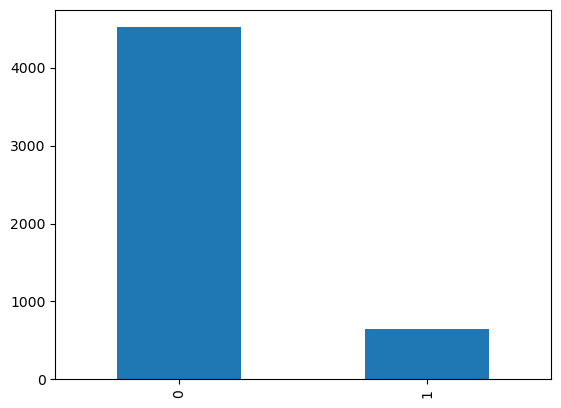

In [17]:
df["target"].value_counts().plot(kind="bar")

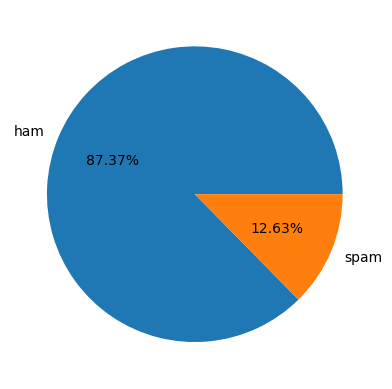

In [18]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=['ham','spam'],autopct='%.2f%%')
plt.show()

In [19]:
#Feature Engineering**
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anuj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df["num_characters"]=df["text"].apply(len)
df["num_words"]=df["text"].apply(lambda x: len(nltk.word_tokenize(x)))
df["num_sentence"]=df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\Anuj\AppData\Local\Temp\ipykernel_9684\2106559687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_characters"]=df["text"].apply(len)
C:\Users\Anuj\AppData\Local\Temp\ipykernel_9684\2106559687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_words"]=df["text"].apply(lambda x: len(nltk.word_tokenize(x)))
C:\Users\Anuj\AppData\Local\Temp\ipykernel_9684\2106559687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [21]:
df

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [22]:
df[["num_characters","num_words"]].describe()

,num_characters,num_words
count,5169.000000,5169.000000
mean,78.977945,18.453279
std,58.236293,13.324793
min,2.000000,1.000000
25%,36.000000,9.000000
50%,60.000000,15.000000
75%,117.000000,26.000000
max,910.000000,220.000000


In [23]:
df[["num_characters","num_sentence"]].describe()

,num_characters,num_sentence
count,5169.000000,5169.000000
mean,78.977945,1.947185
std,58.236293,1.362406
min,2.000000,1.000000
25%,36.000000,1.000000
50%,60.000000,1.000000
75%,117.000000,2.000000
max,910.000000,28.000000


In [24]:
df[df['target'] == 0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [25]:
df[df['target'] == 1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


**Visualization**

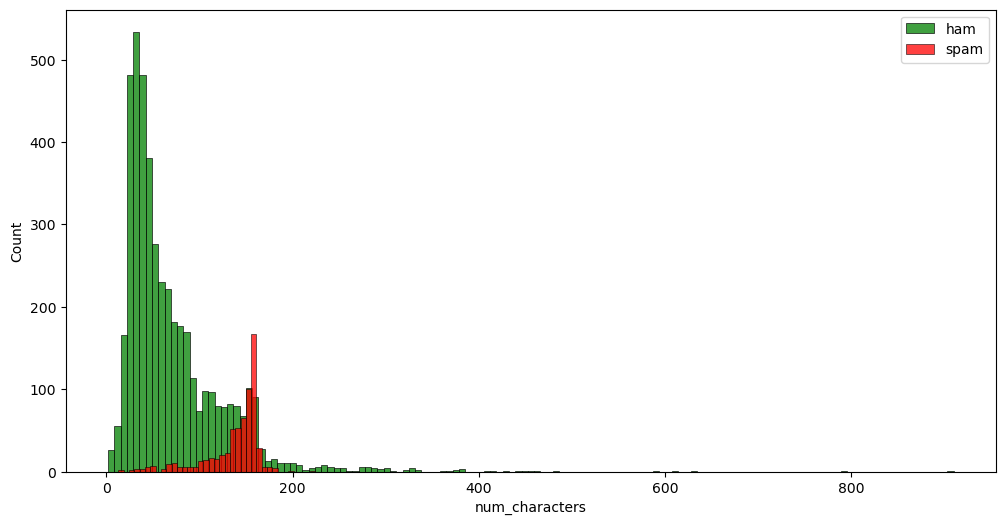

In [30]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_characters"],label="ham",color='green')
sns.histplot(df[df["target"]==1]["num_characters"],label='spam',color='red')
plt.legend()
plt.show()

In [35]:
# so number of characters is  on a higher side with spam messages  whereas ham mesages , generally have less characters

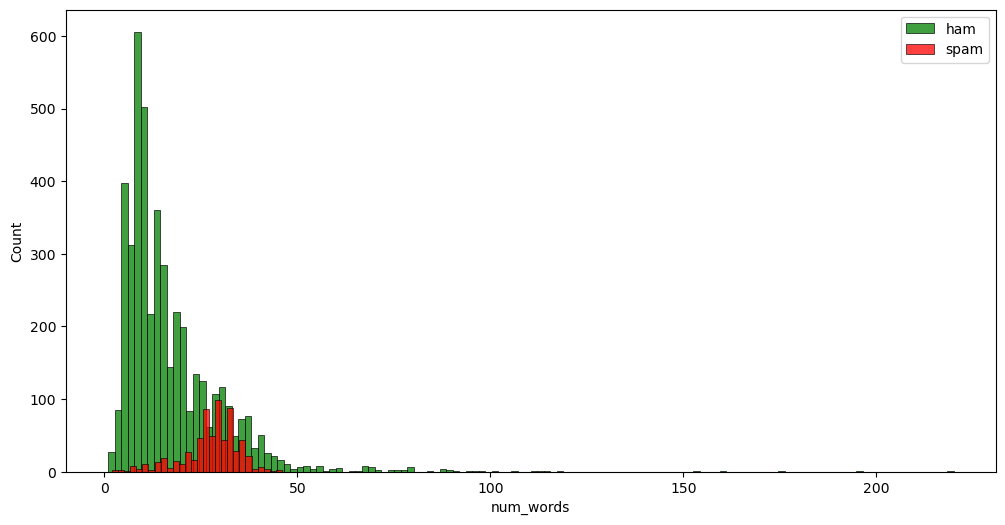

In [31]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_words"],label="ham",color='green')
sns.histplot(df[df["target"]==1]["num_words"],label='spam',color='red')
plt.legend()
plt.show()

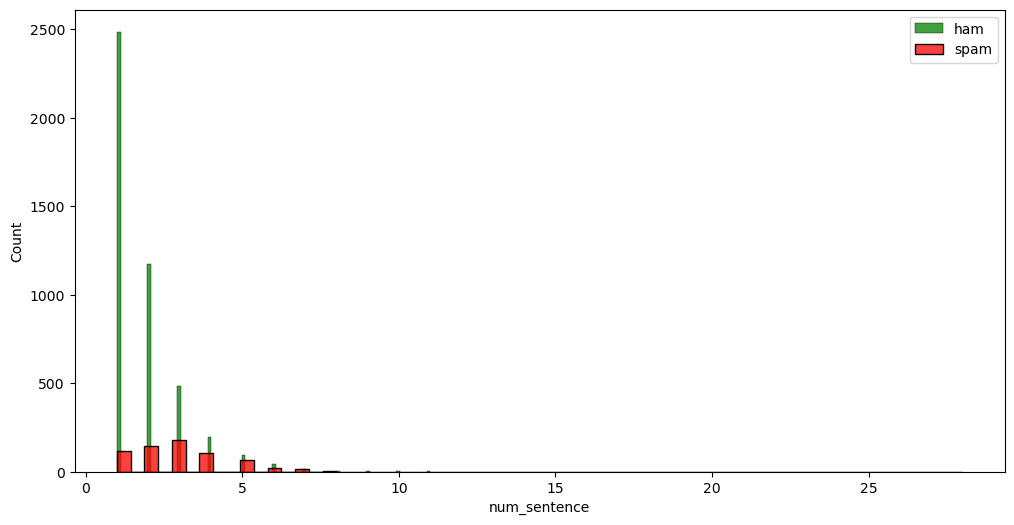

In [32]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_sentence"],label="ham",color='green')
sns.histplot(df[df["target"]==1]["num_sentence"],label='spam',color='red')
plt.legend()
plt.show()

<AxesSubplot:>

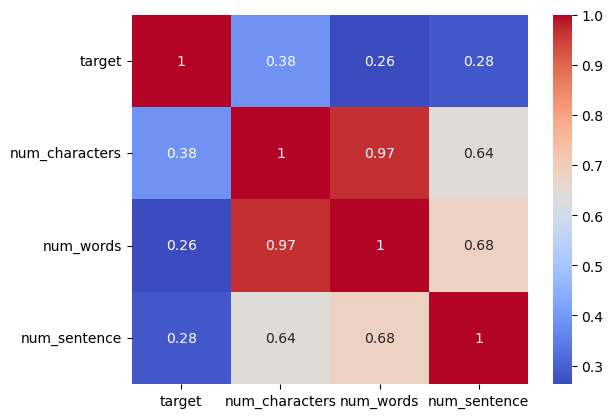

In [34]:
# lets visulize heat map
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [ ]:
#INsights
# according to above visualization our target has positive coorealation with num_characters column more than bum_words and num_sentences and 
#num_characters has high coorelation with num_words so we can have num_characters for model training as num_characters has better coorealation with target  

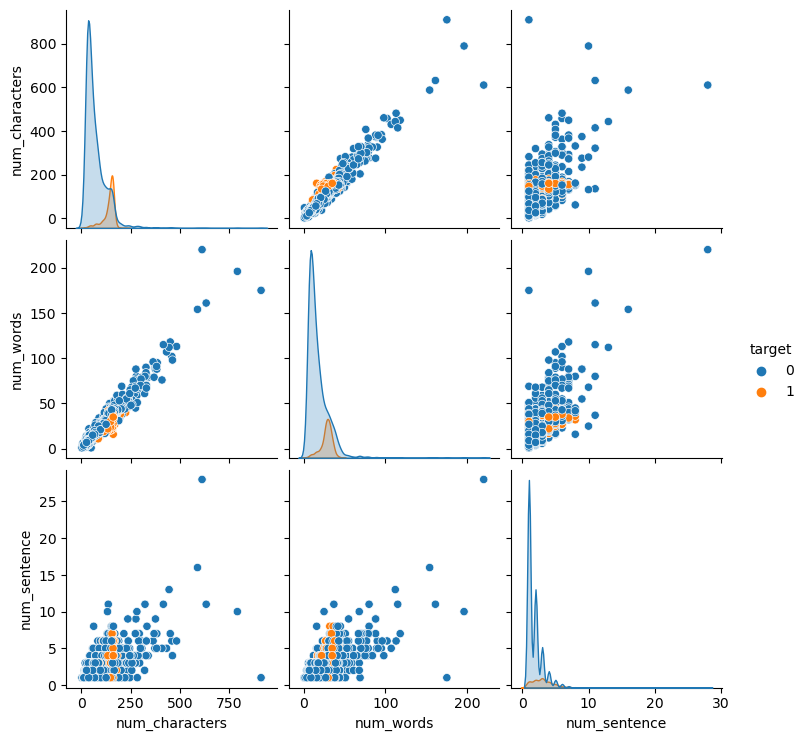

In [35]:
sns.pairplot(df,hue="target")

In [40]:
# now we will do 
#1)Lower string
#2)Tokenization
#3)removing special characters
#4)removing stop words and punctuation
#5)stemming


In [37]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
def transform_text(text):
    # lowering the text
    text=text.lower()
    # tokenize the text in to indivitual words
    text=nltk.word_tokenize(text)
    filtered_words=[]
    # Iterate over each word in the text
    for word in text:
        # Check if the word contains only alphanumeric characters
        if word.isalnum():
            # Add the word to the filtered list
            filtered_words.append(word)
    
    # Update the text with the filtered words
    text = filtered_words[:]
    filtered_words.clear()
    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            filtered_words.append(word)
    text=filtered_words[:]
    filtered_words.clear()
    stemmer=PorterStemmer()
    for word in text:
        stemmed_word=stemmer.stem(word)
        filtered_words.append(stemmed_word)
    transformed_text=" ".join(filtered_words)
    
    return transformed_text


In [38]:
nltk.download('stopwords')
transform_text("Hi! How are you dabang %%")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anuj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'hi dabang'

In [39]:
# create a new column
df["transformed_text"]=df['text'].apply(transform_text)

C:\Users\Anuj\AppData\Local\Temp\ipykernel_9684\1607014707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_text"]=df['text'].apply(transform_text)


In [40]:
df

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [41]:
#!pip install wordcloud
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [42]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

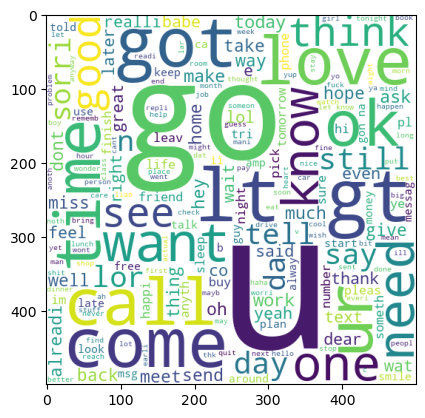

In [43]:
plt.imshow(ham_wc)

In [44]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

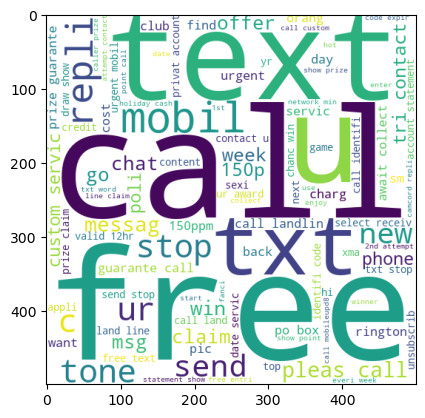

In [45]:
plt.imshow(spam_wc)

In [46]:
# now we will get top 25 words from corpus
ham_frequency=[]
for msg in df[df["target"]==0]['transformed_text'].to_list():
    for word in msg.split():
        ham_frequency.append(word)

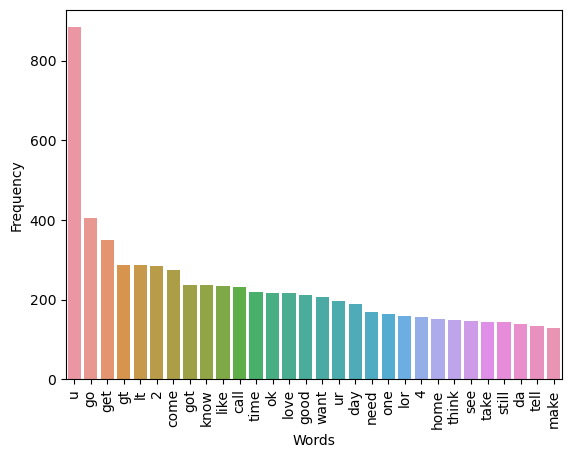

In [47]:
from collections import Counter
word_frequency=Counter(ham_frequency)
top_common_words=word_frequency.most_common(30)
df_most_common=pd.DataFrame(top_common_words,columns=["Words","Frequency"])
df_most_common
# Plot the bar plot
sns.barplot(data=df_most_common, x='Words', y='Frequency')
plt.xticks(rotation='vertical')
plt.show()

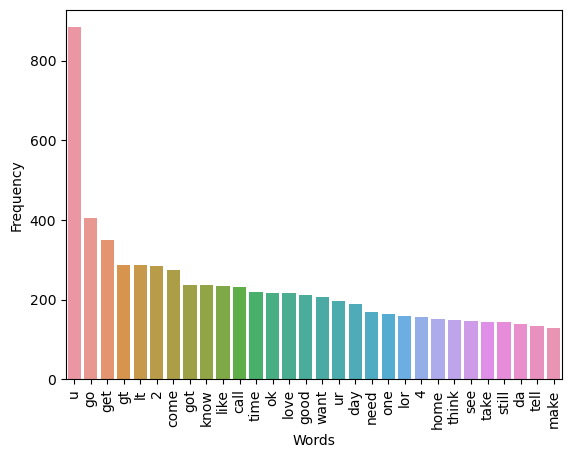

In [48]:
Spam_frequency=[]
for msg in df[df["target"]==1]['transformed_text'].to_list():
    for word in msg.split():
        ham_frequency.append(word)
from collections import Counter
word_frequency1=Counter(ham_frequency)
top_common_words1=word_frequency.most_common(30)
df_most_common1=pd.DataFrame(top_common_words,columns=["Words","Frequency"])
df_most_common1
# Plot the bar plot
sns.barplot(data=df_most_common1, x='Words', y='Frequency')
plt.xticks(rotation='vertical')
plt.show()

In [52]:
#we are taking most frequent 5000 words from the vocabulary 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['transformed_text']).toarray()

In [53]:
X.shape

(5169, 6708)

In [54]:
Y=df["target"].values

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [56]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [57]:
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()
# Create a Multinomial Naive Bayes classifier
mnb = MultinomialNB()
# Create a Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

In [58]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [59]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [60]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [62]:
X1 = tfidf.fit_transform(df['transformed_text']).toarray()

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X1,Y,test_size=0.2,random_state=2)

In [73]:
X1.shape

(5169, 3000)

In [74]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [91]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [76]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [77]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [78]:
# Create different classifier models
svc = SVC(kernel='sigmoid', gamma=1.0)  
knc = KNeighborsClassifier()  
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)  
bc = BaggingClassifier(n_estimators=50, random_state=2)  
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)  


In [79]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'DT': dtc,
    'NB': mnb, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [80]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    # Train the classifier model using the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Calculate the accuracy score by comparing the predicted labels with the true labels
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate the precision score by comparing the predicted labels with the true labels
    precision = precision_score(y_test, y_pred)
    
    # Return the accuracy and precision scores
    return accuracy, precision

In [81]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [82]:
 #Create a DataFrame to store performance metrics of different algorithms
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores})

In [83]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,DT,0.929400,0.828283
3,NB,0.970986,1.000000
4,LR,0.958414,0.970297
5,RF,0.974855,0.982759
6,AdaBoost,0.960348,0.929204
7,BgC,0.957447,0.867188
8,ETC,0.974855,0.974576
9,GBDT,0.947776,0.920000


In [84]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,KN,Accuracy,0.905222
2,DT,Accuracy,0.929400
3,NB,Accuracy,0.970986
4,LR,Accuracy,0.958414
5,RF,Accuracy,0.974855
6,AdaBoost,Accuracy,0.960348
7,BgC,Accuracy,0.957447
8,ETC,Accuracy,0.974855
9,GBDT,Accuracy,0.947776


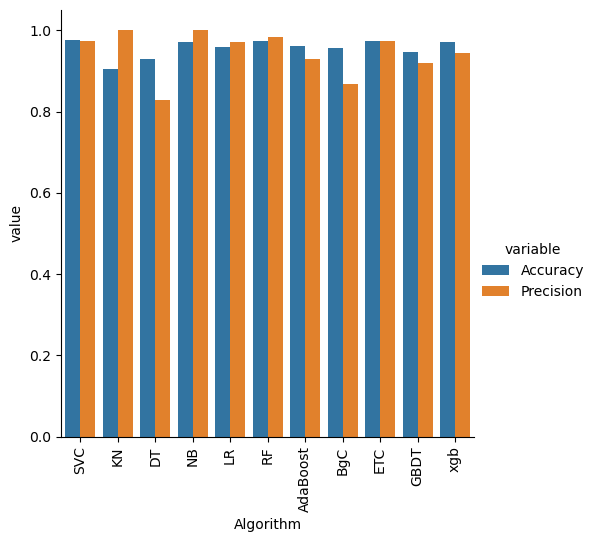

In [85]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1,kind='bar')
plt.xticks(rotation='vertical')
plt.show()


In [86]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [87]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [88]:
# now we will apply stacking also
from sklearn.ensemble import StackingClassifier
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


In [92]:
# so MNB is performing best so we will dump MNB for future use
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))


In [93]:
model=pickle.load(open('model.pkl','rb'))


# Make predictions
predictions = model.predict(X_test)
print(predictions)

[0 0 0 ... 0 0 0]
